[IPython Notebook](beaming_boosting.ipynb) |  [Python Script](beaming_boosting.py)

Beaming and Boosting
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:782: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Let's make our system so that the boosting effects will be quite noticeable.

In [3]:
b['rpole@primary'] = 1.8
b['rpole@secondary'] = 0.96

b['teff@primary'] = 10000
b['gravb_bol@primary'] = 1.0
b['teff@secondary'] = 5200
b['gravb_bol@secondary'] = 0.32

b['q@binary'] = 0.96/1.8
b['incl@binary'] = 88

b['period@binary'] = 1.0
b['sma@binary'] = 6.0

Thu, 22 Sep 2016 10:54 PARAMETERS   WARNING Object probably has a convective atm (teff=5200K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Thu, 22 Sep 2016 10:54 PARAMETERS   WARNING Object probably has a convective atm (teff=5200K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Thu, 22 Sep 2016 10:54 PARAMETERS   WARNING misaligned orbits are not currently supported.
Thu, 22 Sep 2016 10:54 PARAMETERS   WARNING misaligned orbits are not currently supported.



We'll add lc, rv, and mesh datasets so that we can see how they're each affected by beaming and boosting.

In [4]:
times = np.linspace(0,1,101)

In [5]:
b.add_dataset('lc', times=times, dataset='lc01')

<ParameterSet: 12 parameters | kinds: lc, lc_dep>

In [6]:
b.add_dataset('rv', times=times, dataset='rv01')

<ParameterSet: 10 parameters | kinds: rv, rv_dep>

In [7]:
b.add_dataset('mesh', times=times[::10], dataset='mesh01')

<ParameterSet: 1 parameters>

Relevant Parameters
---------------------------------

In [8]:
b.add_compute(compute='mycompute', reflection_method='none')

<ParameterSet: 27 parameters | datasets: mesh01, lc01, rv01>

In [9]:
print b['boosting_method@compute']

Parameter: boosting_method@mycompute@compute
                       Qualifier: boosting_method
                     Description: Type of boosting method
                           Value: none
                         Choices: none, linear



In [10]:
print b['boosting_method@compute'].choices

['none', 'linear']


Influence on Light Curves (fluxes)
----------------------------

In [11]:
b.run_compute(compute='mycompute', boosting_method='none', model='boosting_none')

<ParameterSet: 954 parameters | kinds: rv, mesh, lc>

In [12]:
b.run_compute(compute='mycompute', boosting_method='linear', model='boosting_linear')

<ParameterSet: 954 parameters | kinds: rv, mesh, lc>

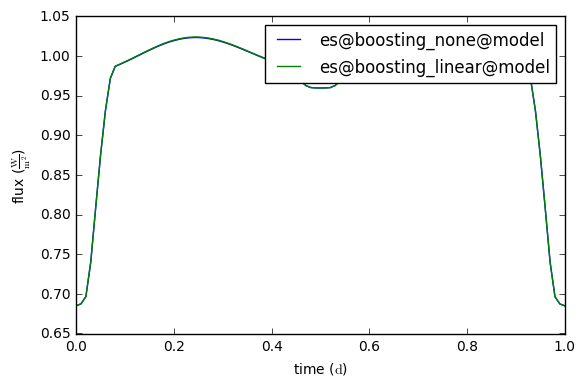

In [23]:
axs, artists = b['lc01'].plot()
leg = plt.legend()

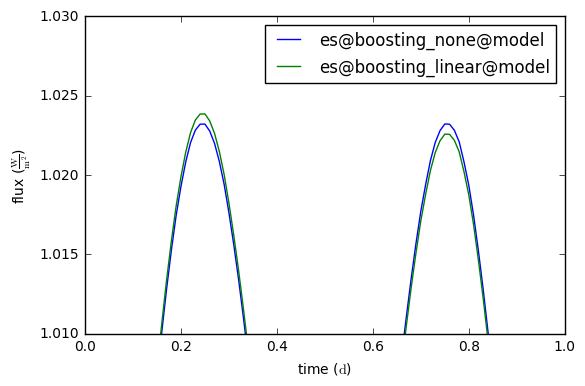

In [26]:
axs, artists = b['lc01'].plot(ylim=(1.01,1.03))
leg = plt.legend()

Influence on Radial Velocities
---------------------

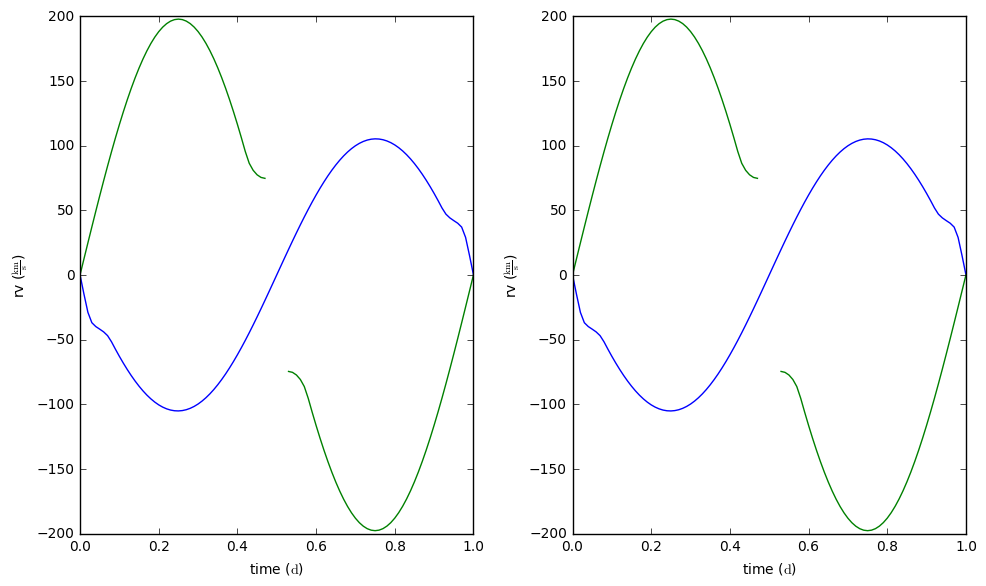

In [14]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['rv01@boosting_none'].plot(ax=ax1)
axs, artists = b['rv01@boosting_linear'].plot(ax=ax2)

Influence on Meshes
-------------------------

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:153: RuntimeWarning: invalid value encountered in divide
  colorarray /= np.nanmax(colorarray)
/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:


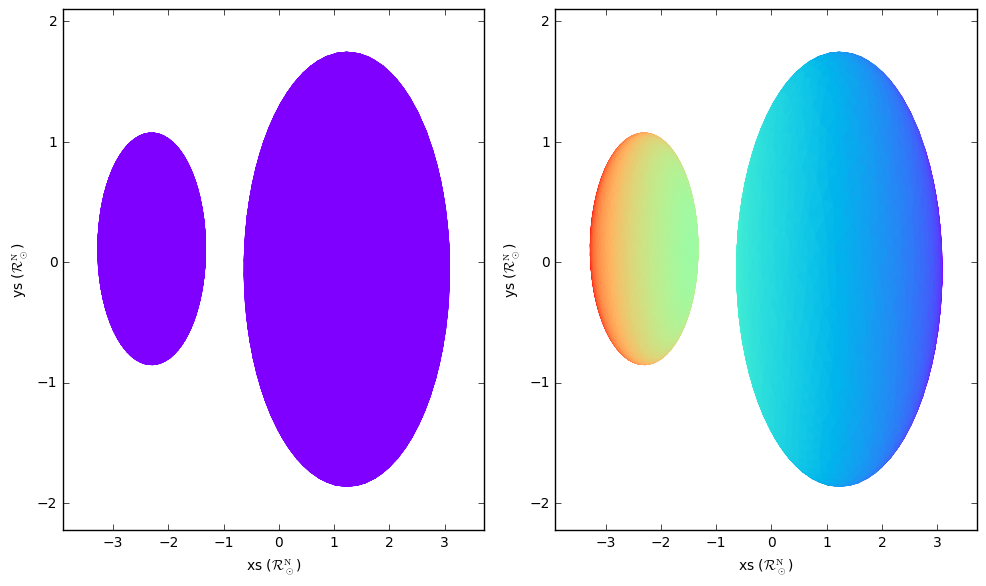

In [15]:
fig = plt.figure(figsize=(10,6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['mesh@boosting_none'].plot(time=0.6, facecolor='boost_factors@lc01', edgecolor=None, ax=ax1)
axs, artists = b['mesh@boosting_linear'].plot(time=0.6, facecolor='boost_factors@lc01', edgecolor=None, ax=ax2)